#### Импорт необходимых библиотек

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import random

#### Преобработка данных

###### Исскуственно добавим пропуски

In [2]:
df = pd.read_csv('pokemon.csv')

col_names = ['number', 'total', 'hp', 'attack', 'defense',
                 'sp_attack', 'sp_defense', 'speed']
for col_name in col_names:
    rows = np.random.randint(0, len(df) - 1, 1)
    for row in rows:
        df[col_name][row] = np.nan
df.isnull().sum()

number          1
name            0
type1           0
type2         498
total           1
hp              1
attack          1
defense         1
sp_attack       1
sp_defense      1
speed           1
generation      0
legendary       0
dtype: int64

<AxesSubplot:>

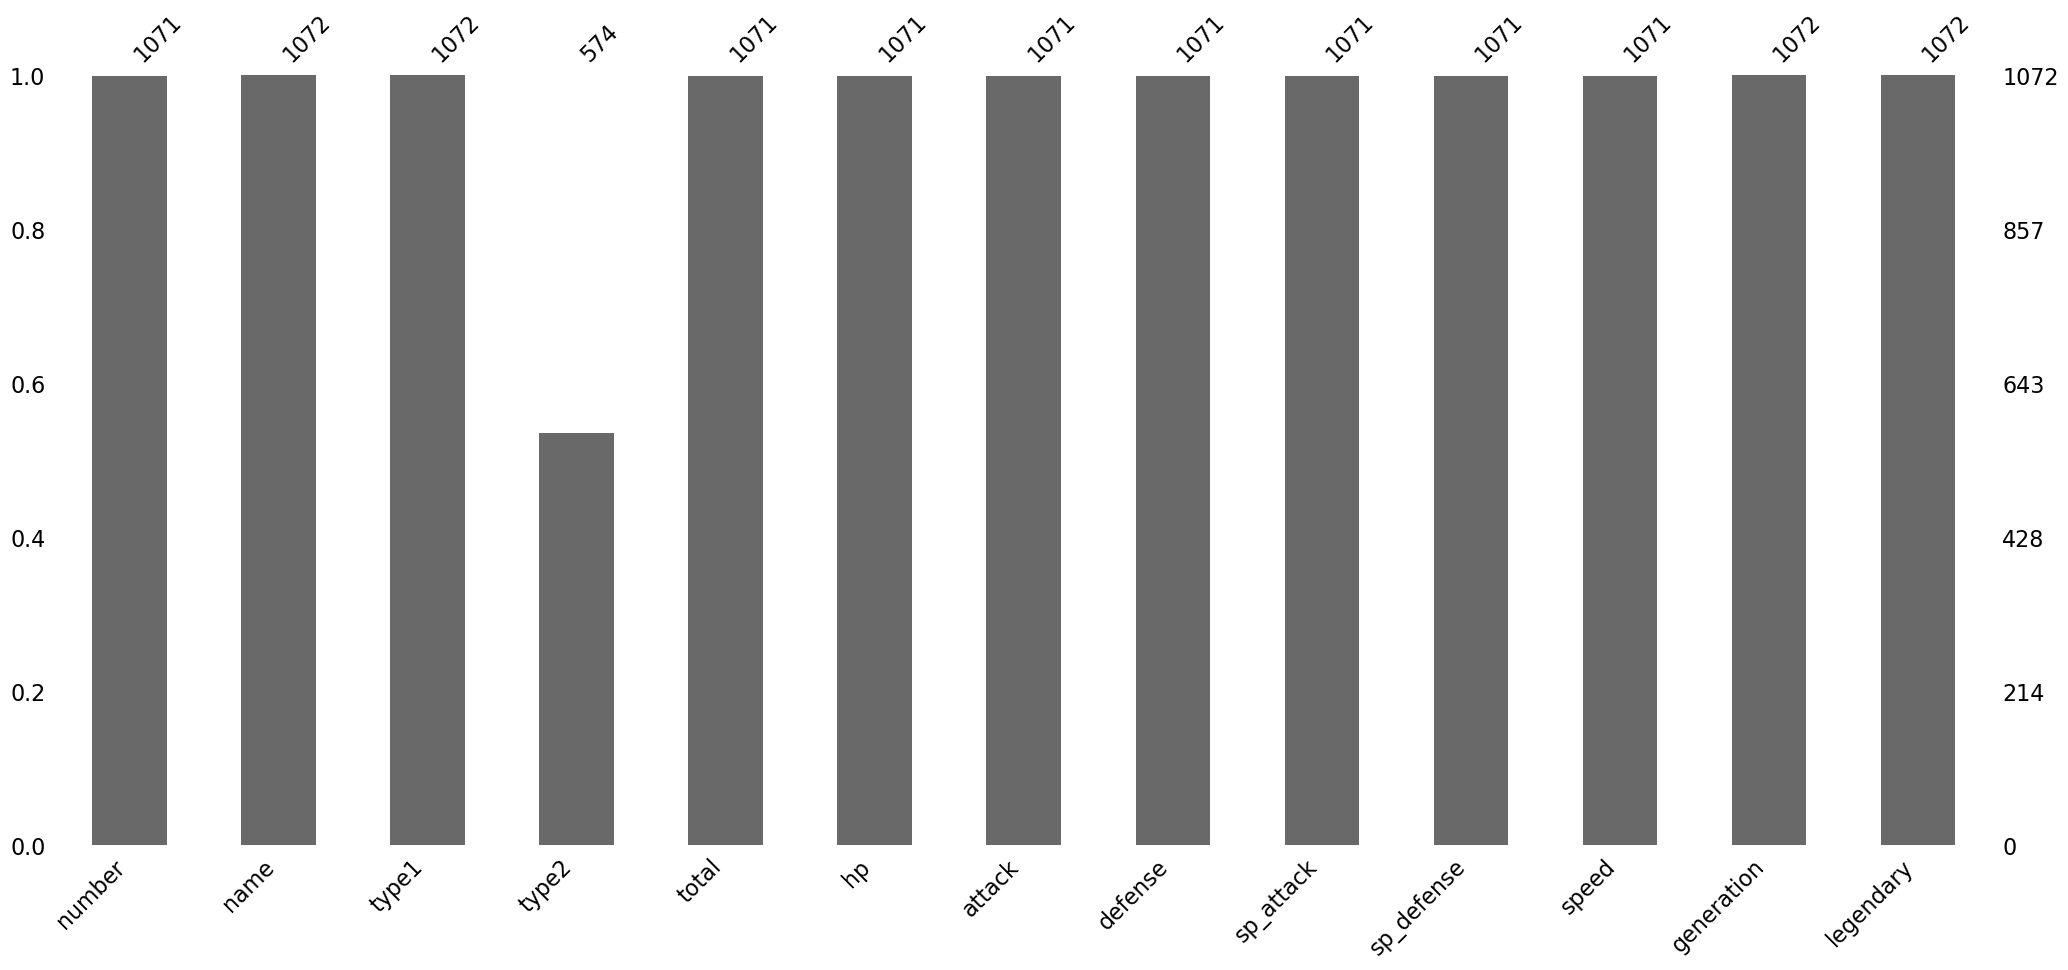

In [3]:
import missingno as msno

msno.bar(df)

###### Числовые переменные помечаем меткой float64, а категориальные меткой category

In [4]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

In [5]:
df.tail()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1067,896.0,Glastrier,Ice,NaN,580.0,100.0,145.0,130.0,65.0,110.0,30.0,8,True
1068,897.0,Spectrier,Ghost,NaN,580.0,100.0,65.0,60.0,145.0,80.0,130.0,8,True
1069,898.0,Calyrex,Psychic,Grass,500.0,100.0,80.0,80.0,80.0,80.0,80.0,8,True
1070,898.0,Ice Rider Calyrex,Psychic,Ice,680.0,100.0,165.0,150.0,85.0,130.0,50.0,8,True
1071,898.0,Shadow Rider Calyrex,Psychic,Ghost,680.0,100.0,85.0,80.0,165.0,100.0,150.0,8,True


In [6]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1.0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1,False
1,2.0,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1,False
2,3.0,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1,False
3,3.0,Mega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1,False
4,3.0,Gigantamax Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      1071 non-null   float64 
 1   name        1072 non-null   category
 2   type1       1072 non-null   category
 3   type2       574 non-null    category
 4   total       1071 non-null   float64 
 5   hp          1071 non-null   float64 
 6   attack      1071 non-null   float64 
 7   defense     1071 non-null   float64 
 8   sp_attack   1071 non-null   float64 
 9   sp_defense  1071 non-null   float64 
 10  speed       1071 non-null   float64 
 11  generation  1072 non-null   int64   
 12  legendary   1072 non-null   bool    
dtypes: bool(1), category(3), float64(8), int64(1)
memory usage: 122.8 KB


In [8]:
df.describe(include='all')

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
count,1071.000000,1072,1072,574,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1072.000000,1072
unique,NaN,1072,20,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Abomasnow,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,136,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954
mean,445.120448,NaN,NaN,NaN,440.848739,70.459384,80.966387,74.986928,73.211018,72.474323,68.829132,4.294776,NaN
std,267.878368,NaN,NaN,NaN,121.429890,26.865431,32.465838,31.216665,32.594540,27.947197,30.066930,2.346472,NaN
min,1.000000,NaN,NaN,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,NaN
25%,209.500000,NaN,NaN,NaN,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000,NaN
50%,442.000000,NaN,NaN,NaN,460.000000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000,NaN
75%,681.500000,NaN,NaN,NaN,519.500000,83.500000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000,NaN


#### Выполним поиск признаков, содержащих NaN.

<AxesSubplot:>

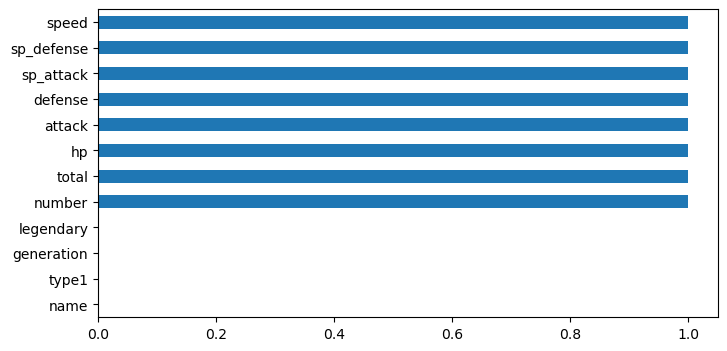

In [9]:
df_wo_type2 = df.drop(['type2'], axis=1)
pd.DataFrame(df_wo_type2.isna().sum(), columns=['NaN count'])\
    .sort_values('NaN count')\
    .plot(kind='barh', legend=False, figsize=(8, 4))

In [10]:
df_wo_type2[df_wo_type2.isna().any(axis=1)]

,number,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
105,77.0,Ponyta,Fire,410.0,50.0,85.0,NaN,65.0,65.0,90.0,1,False
362,293.0,Whismur,Normal,240.0,64.0,NaN,23.0,51.0,23.0,28.0,3,False
372,302.0,Mega Sableye,Dark,NaN,50.0,85.0,125.0,85.0,115.0,20.0,3,False
385,311.0,Plusle,Electric,405.0,60.0,50.0,40.0,85.0,NaN,95.0,3,False
466,382.0,Kyogre,Water,670.0,NaN,100.0,90.0,150.0,140.0,90.0,3,True
656,NaN,Sandile,Ground,292.0,50.0,72.0,35.0,35.0,35.0,65.0,5,False
663,555.0,Darmanitan Zen Mode,Fire,540.0,105.0,30.0,105.0,NaN,105.0,55.0,5,False
671,562.0,Yamask,Ghost,303.0,38.0,30.0,85.0,55.0,65.0,NaN,5,False


#### Применим методы восстановления значений.

In [11]:
mean_speed = df.speed.mean()
index_speed = np.where(np.isnan(df.speed))
df.speed[index_speed[0]] = mean_speed

In [12]:
sp_def_med = df.sp_defense.median()
index_sp_def = np.where(np.isnan(df.sp_defense))
df.sp_defense[index_sp_def[0]] = sp_def_med

In [13]:
print(df.corr()['sp_attack'])

index_sp_atk = df.index[df.sp_attack.apply(pd.isna)][0]
mean_total, mean_sp_def, mean_sp_atk = df.dropna().total.mean(), df.dropna().sp_defense.mean(), df.dropna().sp_attack.mean()
total_corr, sp_defense_corr = df.corr()['sp_attack'].iloc[1], df.corr()['sp_attack'].iloc[6]

print()
print(f'mean total: {mean_total}, mean sp_defense: {mean_sp_def}, mean sp_attack: {mean_sp_atk}')
print(f'total_sp_attack_corr: {round(total_corr, 2)}, sp_defense_sp_attack_corr: {round(sp_defense_corr, 2)}')

numerator = total_corr * (df.total.iloc[index_sp_atk] - mean_total) + sp_defense_corr * (df.sp_defense.iloc[index_sp_atk] - mean_sp_def)
denominator = abs(total_corr) + abs(sp_defense_corr)

empty_sp_atk = mean_sp_atk + (numerator / denominator)

test_sp_attack = df[['hp', 'attack', 'defense', 'sp_defense', 'speed']].iloc[index_sp_atk]
test_true_value = df.total[index_sp_atk]
for i in test_sp_attack:
    test_true_value -= i
print(f'true result: {test_true_value}')
print(f'result: {empty_sp_atk}')
df.sp_attack[index_sp_atk] = empty_sp_atk

number        0.104181
total         0.727167
hp            0.358386
attack        0.365840
defense       0.217839
sp_attack     1.000000
sp_defense    0.505937
speed         0.438140
generation    0.033730
legendary     0.402015
Name: sp_attack, dtype: float64

mean total: 465.0665499124343, mean sp_defense: 76.59019264448337, mean sp_attack: 78.32574430823118
total_sp_attack_corr: 0.73, sp_defense_sp_attack_corr: 0.51
true result: 140.0
result: 134.1707519023446


In [14]:
index_total = df.index[df.total.apply(pd.isna)][0]
df.total[index_total] = df.loc[index_total, 'hp':'speed'].sum()

In [15]:
index_number = df.index[df.number.apply(pd.isna)][0]

number_before = df.number[index_number - 1]
number_after = df.number[index_number + 1]
if number_after == number_before:
    df.number[index_number] = number_before
if number_after - number_before == 2:
    df.number[index_number] = number_before + 1
if number_after - number_before == 1:
    df.number[index_number] = random.choices([number_before, number_after])

In [16]:
index_def = df.index[df.defense.apply(pd.isna)][0]
df.defense[index_def] = round(df.defense[df['total'] > 680].mean(), 0)

In [17]:
index_hp = df.index[df.hp.apply(pd.isna)][0]
df.hp[index_hp] = df.loc[:, 'attack':'speed'].iloc[index_hp].mode()[0]

In [18]:
def calc_metric(sample1: np.array, sample2: np.array, formula: str) -> float:

    fn = {
        'euclid': lambda : np.sqrt(np.sum(np.square(sample1 - sample2))),
        'manhattan': lambda : np.sum(np.abs(sample1 - sample2)),
        'max': lambda : np.max(np.abs(sample1 - sample2))
    }

    return fn[formula]()

In [19]:
metrics_result = []

df_test = df[['total', 'hp', 'defense']]

x = df_test.loc[df.attack.isnull()].to_numpy()

for columns, values in df_test[~df.attack.isnull()].iterrows():
    x2 = values.to_numpy()
    metric_value = calc_metric(x, x2, 'euclid')
    metrics_result.append(metric_value)
    
values = df[~df.attack.isnull()].attack.to_numpy()
metrics_result = np.array(metrics_result)

normal = 1 / np.sum(1 / metrics_result)

score = np.sum(np.divide(values, metrics_result)) * normal


In [20]:
index_atk = df.index[df.attack.apply(pd.isna)][0]
df.attack[index_atk] = score

test_attack = df[['hp', 'defense', 'sp_attack', 'sp_defense', 'speed']].iloc[index_atk]
test_true_value = df.total[index_atk]
for i in test_attack:
    test_true_value -= i
print(f'true atk: {test_true_value}')
print(f'result: {score}')

true atk: 51.0
result: 63.51742180478888


In [21]:
df['type2'] = df['type2'].astype('str')
df['type2'] = df['type2'].replace('nan', 'not have')
df.type2 = df.type2.astype('category')

In [22]:
df.isnull().sum()

number        0
name          0
type1         0
type2         0
total         0
hp            0
attack        0
defense       0
sp_attack     0
sp_defense    0
speed         0
generation    0
legendary     0
dtype: int64

#### Поиск выбросов в числовых признаках

<AxesSubplot:>

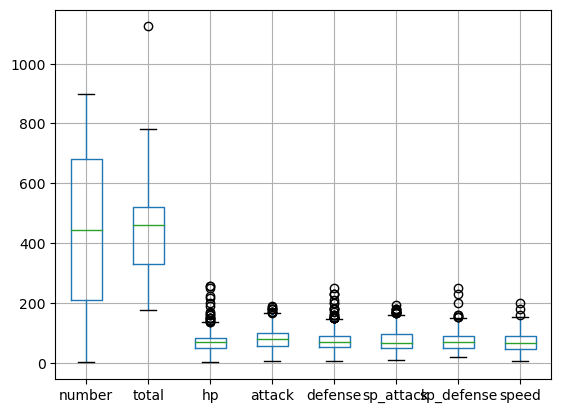

In [23]:
float_cols = df.select_dtypes(include='float64').columns.to_list()
df.boxplot(float_cols)

###### На основе простейшего метода

In [24]:
df_test = df.hp

# normalized_df = (df_test - df_test.min()) / (df_test.max() - df_test.min())
normalized_df = (df_test - df_test.mean()) / df_test.std()

mean = df_test.mean()
median = df_test.median()
print(f'Среднее: {mean},\nМедиана: {median}')

lower_limit = normalized_df.mean() - (3 * normalized_df.std())
upper_limit = normalized_df.mean() + (3 * normalized_df.std())

emissions = df_test.loc[(normalized_df < lower_limit) | (normalized_df > upper_limit)]
emissions

Среднее: 70.4776119402985,
Медиана: 68.0


155     250.0
192     160.0
193     160.0
259     190.0
304     255.0
396     170.0
705     165.0
848     216.0
938     223.0
1057    255.0
1066    200.0
Name: hp, dtype: float64

###### На основе методов без использование среднего и СКО

In [25]:
q25 = np.percentile(df_test, 25)
q75 = np.percentile(df_test, 75)

lower_limit = q25 - 1.5 * (q75 - q25)
upper_limit = q75 + 1.5 * (q75 - q25)

emissions = df_test.loc[(df_test < lower_limit) | (df_test > upper_limit)]
emissions

57      140.0
155     250.0
192     160.0
193     160.0
259     190.0
304     255.0
358     150.0
366     144.0
396     170.0
518     150.0
589     150.0
590     150.0
705     165.0
848     216.0
930     137.0
931     137.0
938     223.0
1056    140.0
1057    255.0
1066    200.0
Name: hp, dtype: float64

###### На основе критерия Шовене

In [26]:
from scipy.special import erfc
import numpy as np


def chauvenet(y: np.array, mean=None, stdv=None) -> np.array:
    if mean is None:
        mean = y.mean()
    if stdv is None:
        stdv = y.std()

    abs_deviation = np.abs(y - mean) / stdv
    d = erfc(abs_deviation)

    threshold = 1 / (2 * y.size - 1)

    is_outlier = d > threshold
    
    return is_outlier

mean = df_test.mean()
stdv = df_test.std()

def iterate(sample: np.array, repeat: bool = True) -> np.array:
    test_result = chauvenet(sample, mean, stdv)
    repeat = np.any(test_result == False)
    
    if repeat:
        return iterate(sample[test_result], repeat)
    
    return sample
    
iterate(sample=df_test)


0        45.0
1        60.0
2        80.0
3        80.0
4        80.0
        ...  
1067    100.0
1068    100.0
1069    100.0
1070    100.0
1071    100.0
Name: hp, Length: 1051, dtype: float64

In [27]:
from scipy.spatial.distance import pdist, squareform

df_test = df[['total', 'hp', 'attack']]

df_test = (df_test - df_test.mean()) / df_test.std()

distances = pdist(df_test, 'euclidean')
distance_matrix = squareform(distances)

limit = np.percentile(distances, 99)

emissions = []

for i in range(len(distance_matrix)):
    for j in range(i + 1, len(distance_matrix)):
        if distance_matrix[i][j] > limit:
            emissions.append((i, j, distance_matrix[i][j]))

# for i in emissions:
#     print(f'Расстояние между объектами {i[0]} и {i[1]} = {i[2]}')
print(len(emissions))

5740


#### Тесты на статистическую значимость

###### Выберем в качестве X и Y числовые переменные

In [28]:
from scipy.stats import shapiro, ttest_ind

X = df.defense
Y = df.speed

X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()

_, p_value_x = shapiro(X)
_, p_value_y = shapiro(Y)

print('p-value x:', p_value_x)
print('p-value y:', p_value_y)

_, p_value = ttest_ind(X, Y)

print('p-value:', p_value)

p-value x: 2.9392935720056984e-20
p-value y: 4.1587397414666327e-10
p-value: 0.9999999999999989


###### Если p-value < alpha, то отвергаем H0 (x.mean == y.mean). Если p-value > alpha, то можно говорить о том, что статистически значимых различий между средними значениями выборок нет.

###### Выберем в качестве X и Y числовую и номинальную переменную соответственно

F_onewayResult(statistic=9.377411148625349, pvalue=1.7934607063207123e-25)

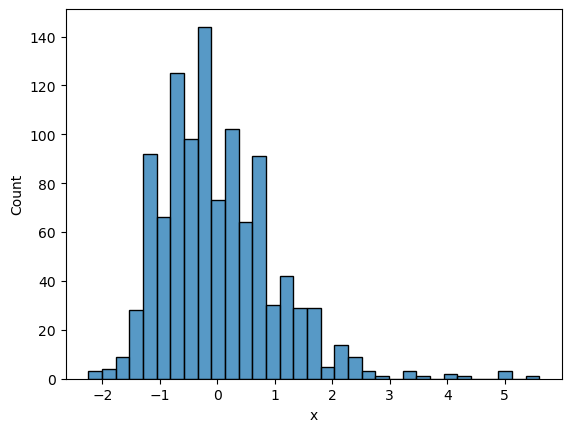

In [29]:
import scipy.stats as stats
import seaborn as sns

df['x'] = (df['defense'] - df['defense'].mean()) / df['defense'].std()
sns.histplot(df['x'])
stats.normaltest(df['x'])

groups = []
for group in df['type1'].unique():
    groups.append(df.loc[df['type1'] == group, 'x'])
    
stats.f_oneway(*groups)

###### Исходя из полученных данных, можно заключить, что между выборками есть статистические значимые различия.

###### Выберем в качестве X и Y номинальные переменные

In [30]:
from scipy.stats import chi2_contingency

# частота каждой категории
crosstab  = pd.crosstab(df['type1'], df['type2'])

# критерий хи-квадрат
chi2, p_value, dof, expected_freq = chi2_contingency(crosstab)

print("Chi-square statistic: ", chi2)
print("p-value: ", p_value)
print("Degrees of freedom: ", dof)
print("Expected frequencies:\n", expected_freq)

Chi-square statistic:  876.3885206691266
p-value:  1.347129384990692e-48
Degrees of freedom:  342
Expected frequencies:
 [[9.32835821e-03 2.61194030e-02 3.26492537e-02 1.02611940e-02
  4.10447761e-02 2.98507463e-02 1.67910448e-02 1.06343284e-01
  2.42537313e-02 2.70522388e-02 3.63805970e-02 1.77238806e-02
  1.02611940e-02 3.82462687e-02 4.01119403e-02 1.49253731e-02
  3.35820896e-02 2.05223881e-02 4.64552239e-01]
 [7.74253731e-01 2.16791045e+00 2.70988806e+00 8.51679104e-01
  3.40671642e+00 2.47761194e+00 1.39365672e+00 8.82649254e+00
  2.01305970e+00 2.24533582e+00 3.01958955e+00 1.47108209e+00
  8.51679104e-01 3.17444030e+00 3.32929104e+00 1.23880597e+00
  2.78731343e+00 1.70335821e+00 3.85578358e+01]
 [4.47761194e-01 1.25373134e+00 1.56716418e+00 4.92537313e-01
  1.97014925e+00 1.43283582e+00 8.05970149e-01 5.10447761e+00
  1.16417910e+00 1.29850746e+00 1.74626866e+00 8.50746269e-01
  4.92537313e-01 1.83582090e+00 1.92537313e+00 7.16417910e-01
  1.61194030e+00 9.85074627e-01 2.22985

###### Исходя из полученных данных, можно заключить, что между выборками есть статистические значимые различия.